<a href="https://colab.research.google.com/github/DevuP1506/Codsoft-internship-Tasks/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION.**

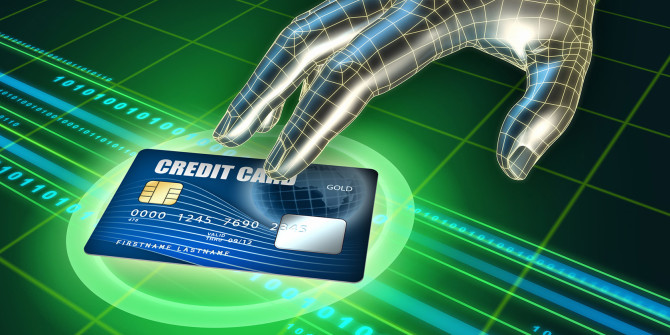

## **CONTENT OVERVIEW.**



## 1.   Introduction.
## 2.   Data Inspection.
## 3.   Data Visualization and Insights Generation.
## 4.   Data Preprocessing.
## 5.   Predictive Analytics.
## 6.   Conclusion.







## **1.Introduction.**

Credit card fraud is a significant concern for both financial institutions and cardholders. Detecting fraudulent transactions is crucial to minimize financial losses and protect customers.By leveraging machine learning techniques let's build a model to detect fraudulent credit card transactions.

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

### Importing Necessary Libraries.

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

### Importing data.

In [56]:
train_df= pd.read_csv('/content/fraudTrain.csv')
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
test_df=pd.read_csv('/content/fraudTest.csv')
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


## **2. DATA INSPECTION.**

Get the shape,columns and remove the duplicates of train and test dataset and concatenate them.

In [5]:
train_df.shape

(1296675, 23)

In [6]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
train_df.drop_duplicates(inplace=True)

In [8]:
test_df.shape

(555719, 23)

In [9]:
test_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
test_df.drop_duplicates(inplace=True)

In [11]:
#Concatenate both the dataset.
df = pd.concat([train_df, test_df],ignore_index=True)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [12]:
#Get the first five rows of concatenated df.
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
#Get the last five rows of df.
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [14]:
#Get the shape of df.
df.shape

(1852394, 23)

In [15]:
#Get the columns of df.
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [17]:
#Get the statistical description of df.
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## **3. DATA VISUALIZATION.**

In [19]:
df['year']=pd.to_datetime(df['trans_date_trans_time']).dt.year
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.day
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
df.drop(['trans_date_trans_time'],axis=1,inplace=True)
df

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,1,1,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,1,1,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,1,1,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019,1,1,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020,12,31,23
1852390,555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020,12,31,23
1852391,555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020,12,31,23
1852392,555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020,12,31,23


### Analysis of transactions by Year.

In [20]:
#Group by year and get the count of strikes
year_df = df.groupby('year').size().reset_index(name='Count')

#Barchart using Plotly Express
bar_year = px.bar(year_df, x='year', y='Count', labels={'year': 'Year', 'Count': 'Number of Transactions'},title='Transactions Count by Year', color_discrete_sequence=['#1f77b4'])
bar_trace = bar_year['data'][0]
bar_year.show()

### Output Evaluation: Maximum transactions occur in 2020.

### Analysis of transactions by Month.

In [21]:
#Group by year and get the count of strikes
month_df = df.groupby('month').size().reset_index(name='Count')

#Barchart using Plotly Express
bar_month = px.bar(month_df, x='month', y='Count', labels={'month': 'Month', 'Count': 'Number of Transactions'},title='Transactions Count by Month', color_discrete_sequence=['#1f77b4'])
bar_trace = bar_month['data'][0]
bar_month.show()

### Output Evaluation:Maximum transactions occur in December.

### Distribution of Fraudulent and Legitimate Transactions.

In [22]:
fraud_count=df['is_fraud'].value_counts()
fraud_count

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [23]:
#PieChart
pie_chart = px.pie(fraud_count,
                  values=fraud_count.values,
                  names=fraud_count.index,
                  color=fraud_count.index,
                  title='Distribution of Fraudulent Transactions',
                  labels={'values': 'Frequency', 'names': 'is_fraud'},
                       hole=.4,)
# Adding text labels
pie_chart.update_traces(textinfo='label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1])

# Customizing layout
pie_chart.update_layout(font=dict(size=14, color="black"), height=500,template='plotly',)
# Show the pie chart
pie_chart.show()

### Output Evaluation: Fraudulent transactions are rare(0.5%) compared to Legitimate ones(99.5%).

### Gender based Transactions.

<Axes: xlabel='gender', ylabel='count'>

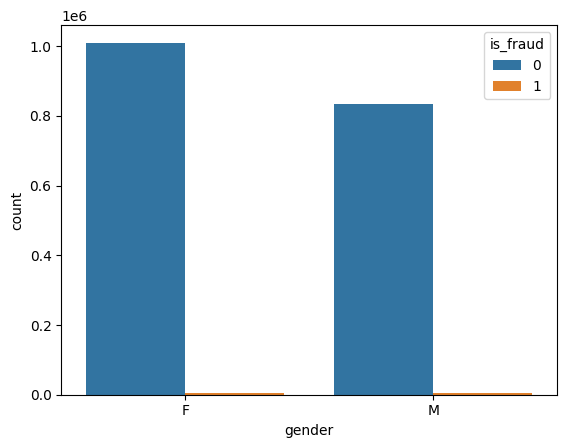

In [24]:
sns.countplot(x='gender',data=df,hue='is_fraud')

### Analysis of Fraudulent Transactions by Year.

In [25]:
#Subset the dataframe as Fraud transactions.

df_fraud = df.loc[(df['is_fraud'] != 0)]
df_fraud

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour
2449,2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019,1,2,1
2472,2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1,2019,1,2,1
2523,2523,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1,2019,1,2,3
2546,2546,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1,2019,1,2,3
2553,2553,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1,2019,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,517197,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1,2020,12,22,22
1813949,517274,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1,2020,12,22,22
1814016,517341,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1,2020,12,22,22
1814204,517529,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1,2020,12,22,23


In [26]:
year_df = df_fraud.groupby('year').size().reset_index(name='Count')

#Barchart using Plotly Express
bar_year = px.bar(year_df, x='year', y='Count', labels={'year': 'Year', 'Count': 'Number of Transactions'},title='Transactions Count by Year', color_discrete_sequence=['#1f77b4'])
bar_trace = bar_year['data'][0]
bar_year.show()

### Output Evaluation:Maximum fraudulent transaction occur in 2019.

### Analysis of Fraudulent transactions by month and hour.

In [27]:
#Group by month
month_df = df_fraud.groupby('month').size().reset_index(name='Count')

#Barchart using Plotly Express
bar_month = px.bar(month_df, x='month', y='Count', labels={'month': 'Month', 'Count': 'Number of Transactions'},title='Transactions Count by Month', color_discrete_sequence=['#1f77b4'])
bar_trace = bar_month['data'][0]
bar_month.show()

In [28]:
#Group by hour
hour_df = df_fraud.groupby('hour').size().reset_index(name='Count')

#Barchart using Plotly Express
bar_hour = px.bar(hour_df, x='hour', y='Count', labels={'hour': 'Hour', 'Count': 'Number of Transactions'},title='Transactions Count by Month', color_discrete_sequence=['#1f77b4'])
bar_trace = bar_hour['data'][0]
bar_hour.show()

### Output Evaluation:Maximum fraudulent Transaction ocuur in March at time 10pm.

### Gender based Fraudulent Transactions.

In [29]:
gender_count=df_fraud['gender'].value_counts()
gender_count

F    4899
M    4752
Name: gender, dtype: int64

In [30]:
funnel_chart_area=px.funnel_area(gender_count,gender_count.index,gender_count.values,
                                 title='Gender based Fraudulent transactions')
funnel_chart_area.show()

### Output Evaluation:From first gender based graph, it is clear maximum transactions are done by male. But in the above funnel chart shows that female has done maximum fraud transactions.

### Which category has done maximum transactions.

In [31]:
# Get the categories based on frequency
category_count=df['category'].value_counts().sort_values(ascending=True)
# Create Bar Chart
category_bar= px.bar(category_count, y=category_count.index, x=category_count.values,
                         title='Each category Transactions',
                         orientation='h',
                         color=category_count.values,
                         color_continuous_scale='Jet',
                         labels={'index': 'Category', 'values': 'Frequency'})
#Layout
category_bar.update_layout(font=dict(size=14, color="white"),
                            coloraxis_colorbar=dict(title='Frequency'),
                            height=600,
                            template='plotly_dark')
category_bar.show()

In [32]:
# Get the fraudulent categories based on frequency
category_count1=df_fraud['category'].value_counts().sort_values(ascending=True)
# Create Bar Chart
category_bar1= px.bar(category_count1, y=category_count1.index, x=category_count1.values,
                         title='Each category Transactions',
                         orientation='h',
                         color=category_count1.values,
                         color_continuous_scale='Jet',
                         labels={'index': 'Category', 'values': 'Frequency'})
#Layout
category_bar1.update_layout(font=dict(size=14, color="white"),
                            coloraxis_colorbar=dict(title='Frequency'),
                            height=600,
                            template='plotly_dark')
category_bar1.show()

### Output Evaluation: Category based first bar chart represent that gas transport involved in maximum transactions, but grocery pos and shopping net has done maximum fraud transactions.

### Which State experience Maximum fraudulent transactions.

In [33]:
# Get the data of 20 states based on frequency
state_count=df_fraud['state'].value_counts().head(20).sort_values(ascending=True)
# Create Bar Chart
state_bar= px.bar(state_count, y=state_count.index, x=state_count.values,
                         title='Each State Fraud Transactions',
                         orientation='h',
                         color=state_count.values,
                         color_continuous_scale='Jet',
                         labels={'index': 'State', 'values': 'Frequency'})
#Layout
state_bar.update_layout(font=dict(size=14, color="white"),
                            coloraxis_colorbar=dict(title='Frequency'),
                            height=600,
                            template='plotly_dark')
state_bar.show()

### Output Evaluation:New York(NY) experienced most fraud transactions.

### **4. DATA PREPROCESSING.**

In [34]:
#Encoding the categorical variable(get dummies).

df1=pd.get_dummies(df['category'],drop_first=True)
df1

,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,0,0,0,1,0,0,0,0,0,0,0,0
1852390,0,0,0,0,0,0,1,0,0,0,0,0,0
1852391,0,0,0,0,0,0,1,0,0,0,0,0,0
1852392,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
#Concatenate the encoded df and old df.

df2=pd.concat([df,df1],axis=1)
df2

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,1,0,0,0,0,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,0,0,0,0,0,0,0,0,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,0,0,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,0,0,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,0,1,0,0,0,0,0,0,0,0
1852390,555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,0,0,0,1,0,0,0,0,0,0
1852391,555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,0,0,0,1,0,0,0,0,0,0
1852392,555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,0,0,0,0,0,0,0,0,0,1


In [36]:
#Encoding gender(Label encoder)

label=LabelEncoder()
df2['gender']=label.fit_transform(df2['gender'])
df2

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,...,0,0,0,0,1,0,0,0,0,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,...,1,0,0,0,0,0,0,0,0,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,0,0,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,0,0,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,1,558 Michael Estates,Luray,...,0,1,0,0,0,0,0,0,0,0
1852390,555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,1,572 Davis Mountains,Lake Jackson,...,0,0,0,1,0,0,0,0,0,0
1852391,555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,0,144 Evans Islands Apt. 683,Burbank,...,0,0,0,1,0,0,0,0,0,0
1852392,555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,1,7020 Doyle Stream Apt. 951,Mesa,...,0,0,0,0,0,0,0,0,0,1


In [37]:
from geopy.distance import great_circle

#Calculating distance using latitude, longitude,Merchant Latitude,and Merchant Longitude.

df2['distance_km'] = round(df2.apply(lambda row: great_circle((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1), 2)
df2

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,distance_km
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,...,0,0,0,1,0,0,0,0,0,78.60
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,...,0,0,0,0,0,0,0,0,0,30.21
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,0,0,108.21
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,0,0,95.67
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,...,0,0,0,0,1,0,0,0,0,77.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,1,558 Michael Estates,Luray,...,1,0,0,0,0,0,0,0,0,77.03
1852390,555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,1,572 Davis Mountains,Lake Jackson,...,0,0,1,0,0,0,0,0,0,100.07
1852391,555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,0,144 Evans Islands Apt. 683,Burbank,...,0,0,1,0,0,0,0,0,0,80.76
1852392,555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,1,7020 Doyle Stream Apt. 951,Mesa,...,0,0,0,0,0,0,0,0,1,52.93


In [38]:
#Dropping unnecessary columns for prediction.

df2.drop(['Unnamed: 0','merchant','category','first','last','street','city',
          'state','job','dob','trans_num','cc_num','lat','long','merch_lat','merch_long'],axis=1,inplace=True)
df2

,amt,gender,zip,city_pop,unix_time,is_fraud,year,month,day,hour,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,distance_km
0,4.97,0,28654,3495,1325376018,0,2019,1,1,0,...,0,0,0,1,0,0,0,0,0,78.60
1,107.23,0,99160,149,1325376044,0,2019,1,1,0,...,0,0,0,0,0,0,0,0,0,30.21
2,220.11,1,83252,4154,1325376051,0,2019,1,1,0,...,0,0,0,0,0,0,0,0,0,108.21
3,45.00,1,59632,1939,1325376076,0,2019,1,1,0,...,0,0,0,0,0,0,0,0,0,95.67
4,41.96,1,24433,99,1325376186,0,2019,1,1,0,...,0,0,0,0,1,0,0,0,0,77.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,43.77,1,63453,519,1388534347,0,2020,12,31,23,...,1,0,0,0,0,0,0,0,0,77.03
1852390,111.84,1,77566,28739,1388534349,0,2020,12,31,23,...,0,0,1,0,0,0,0,0,0,100.07
1852391,86.88,0,99323,3684,1388534355,0,2020,12,31,23,...,0,0,1,0,0,0,0,0,0,80.76
1852392,7.99,1,83643,129,1388534364,0,2020,12,31,23,...,0,0,0,0,0,0,0,0,1,52.93


In [39]:
#Check for null values.

df2.isna().sum()

amt               0
gender            0
zip               0
city_pop          0
unix_time         0
is_fraud          0
year              0
month             0
day               0
hour              0
food_dining       0
gas_transport     0
grocery_net       0
grocery_pos       0
health_fitness    0
home              0
kids_pets         0
misc_net          0
misc_pos          0
personal_care     0
shopping_net      0
shopping_pos      0
travel            0
distance_km       0
dtype: int64

In [40]:
#Check for the datatype
df2.dtypes

amt               float64
gender              int64
zip                 int64
city_pop            int64
unix_time           int64
is_fraud            int64
year                int64
month               int64
day                 int64
hour                int64
food_dining         uint8
gas_transport       uint8
grocery_net         uint8
grocery_pos         uint8
health_fitness      uint8
home                uint8
kids_pets           uint8
misc_net            uint8
misc_pos            uint8
personal_care       uint8
shopping_net        uint8
shopping_pos        uint8
travel              uint8
distance_km       float64
dtype: object

In [41]:
#Removing Outliers.

for col in df2.columns:
  if df2[col].dtype in ['int64','float64']:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        df3 = df2.loc[(df2[col]>=lower_bound)&(df2[col]<=upper_bound)]

#Display the cleaned dataframe
        print("Cleaned dataframe:")
        df3
df3.reset_index(drop=True,inplace=False)

Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:


,amt,gender,zip,city_pop,unix_time,is_fraud,year,month,day,hour,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,distance_km
0,4.97,0,28654,3495,1325376018,0,2019,1,1,0,...,0,0,0,1,0,0,0,0,0,78.60
1,107.23,0,99160,149,1325376044,0,2019,1,1,0,...,0,0,0,0,0,0,0,0,0,30.21
2,220.11,1,83252,4154,1325376051,0,2019,1,1,0,...,0,0,0,0,0,0,0,0,0,108.21
3,45.00,1,59632,1939,1325376076,0,2019,1,1,0,...,0,0,0,0,0,0,0,0,0,95.67
4,41.96,1,24433,99,1325376186,0,2019,1,1,0,...,0,0,0,0,1,0,0,0,0,77.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,43.77,1,63453,519,1388534347,0,2020,12,31,23,...,1,0,0,0,0,0,0,0,0,77.03
1852390,111.84,1,77566,28739,1388534349,0,2020,12,31,23,...,0,0,1,0,0,0,0,0,0,100.07
1852391,86.88,0,99323,3684,1388534355,0,2020,12,31,23,...,0,0,1,0,0,0,0,0,0,80.76
1852392,7.99,1,83643,129,1388534364,0,2020,12,31,23,...,0,0,0,0,0,0,0,0,1,52.93


<Axes: >

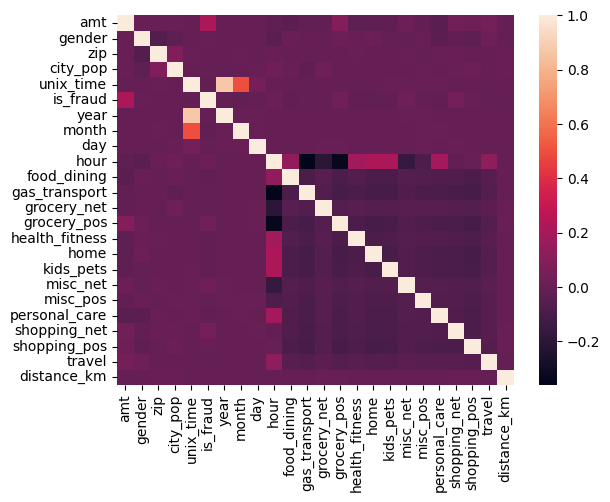

In [42]:
#Correlation heatmap to visualize the interrelationship between variables.

corr=df3.corr()
corr
sns.heatmap(corr)

In [43]:
#Splitting x and y

x = df3.drop(['is_fraud'], axis=1).values
x

array([[4.9700e+00, 0.0000e+00, 2.8654e+04, ..., 0.0000e+00, 0.0000e+00,
        7.8600e+01],
       [1.0723e+02, 0.0000e+00, 9.9160e+04, ..., 0.0000e+00, 0.0000e+00,
        3.0210e+01],
       [2.2011e+02, 1.0000e+00, 8.3252e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0821e+02],
       ...,
       [8.6880e+01, 0.0000e+00, 9.9323e+04, ..., 0.0000e+00, 0.0000e+00,
        8.0760e+01],
       [7.9900e+00, 1.0000e+00, 8.3643e+04, ..., 0.0000e+00, 1.0000e+00,
        5.2930e+01],
       [3.8130e+01, 1.0000e+00, 7.3034e+04, ..., 0.0000e+00, 0.0000e+00,
        7.2440e+01]])

In [44]:
y=df3['is_fraud'].values
y

array([0, 0, 0, ..., 0, 0, 0])

Normalization and Principal Component Analysis for dimensionality reduction.

In [45]:
#Normalization using Standard Scaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#Principal Component Analysis

pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
print("Number of components:", pca.n_components_)

Number of components: 20


Handling Imbalances in the data using Synthetic Minority Oversampling Technique.

In [46]:
x_res,y_res=SMOTE(random_state=2).fit_resample(X_pca,y)

In [47]:
#Training and Testing data
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.30,random_state=42)
x_train

array([[-1.08718615,  1.88142897,  2.47002971, ..., -0.50426247,
         0.36380973, -0.01691757],
       [ 2.40851469,  1.78757101,  2.34336248, ...,  1.84330231,
         3.25321479,  2.90449325],
       [-2.14112653, -1.54584243, -0.27348956, ..., -2.47156805,
         0.15275301,  0.63530745],
       ...,
       [ 0.75025035,  0.59593131,  2.39598171, ...,  0.97872357,
         2.39522815,  2.49989007],
       [ 0.93133713,  2.31243875,  2.61046394, ...,  1.08386092,
        -0.24211662,  0.45317828],
       [ 0.34630363, -0.42862354,  3.7616313 , ..., -0.32183619,
         2.47168797,  3.48278669]])

In [48]:
x_test

array([[ 1.49700619, -0.48333777,  3.4757551 , ..., -0.23957312,
         3.25031019,  2.18598776],
       [ 1.1764787 , -0.70196745, -0.52575445, ...,  1.40686743,
        -0.24085632,  0.31830519],
       [ 0.86914821, -1.05117694,  0.00476281, ...,  0.64899813,
        -0.15360231,  0.44701312],
       ...,
       [-2.3084077 , -1.03176322, -0.36847464, ...,  0.97268813,
         0.5127269 , -0.63931242],
       [ 0.56239045,  0.03802208, -0.04057973, ...,  0.76887033,
        -0.07681088, -0.06513875],
       [-1.08089099, -1.55672471,  1.18285695, ..., -0.32038122,
        -2.01820201, -1.14487111]])

In [49]:
y_train

array([1, 1, 0, ..., 1, 1, 1])

In [50]:
y_test

array([1, 0, 0, ..., 0, 0, 1])

### **5. PREDICTIVE ANALYTICS.**

In this section, we will classify fraudulent and legitimate transactions using three models, including Logistic Regression, Decision Tree, Random Forests. Accuracy,F1 Score and Precision will be used to check the fit of the model.

In [51]:
#Creating object for each model

l_model=LogisticRegression()
d_model=DecisionTreeClassifier(criterion='entropy')
r_model=RandomForestClassifier(criterion='entropy')
lst_model=[l_model,d_model,r_model]

Model name is LogisticRegression()
*****************
[[499723  53143]
 [135406 417374]]
Acuracy score is LogisticRegression()
0.8294671169614868
Model name is DecisionTreeClassifier(criterion='entropy')
*****************
[[548466   4400]
 [  1743 551037]]
Acuracy score is DecisionTreeClassifier(criterion='entropy')
0.9944439721212757
Model name is RandomForestClassifier(criterion='entropy')
*****************
[[550805   2061]
 [   186 552594]]
Acuracy score is RandomForestClassifier(criterion='entropy')
0.9979677039486418


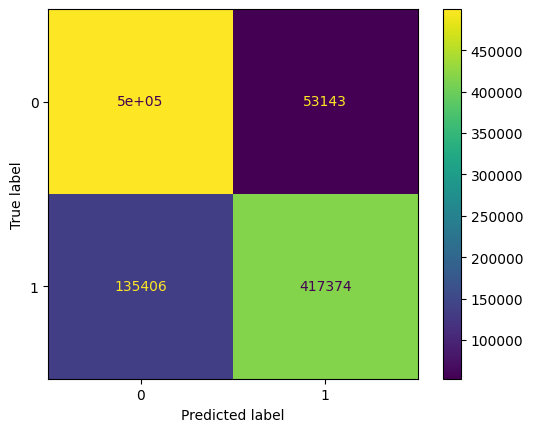

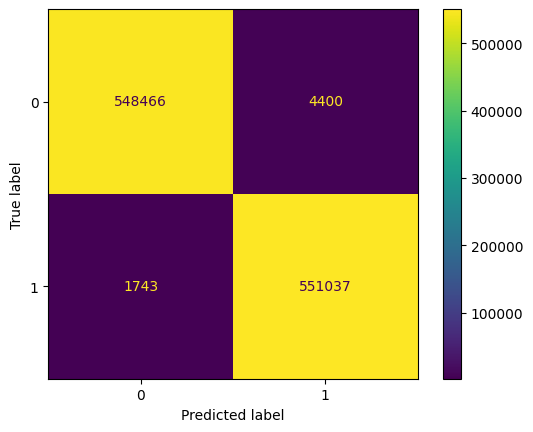

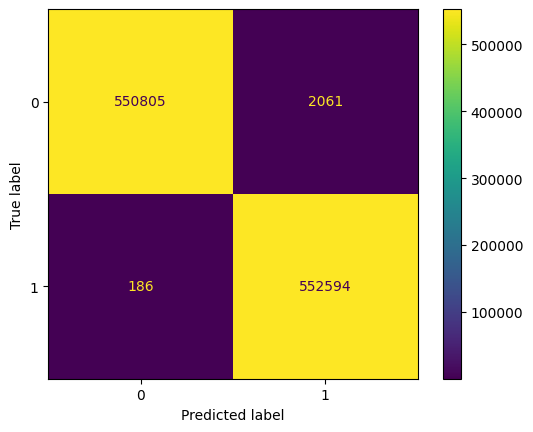

In [52]:
for i in lst_model:
  print("Model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*****************")
  matrix=confusion_matrix(y_test,y_pred)
  print(matrix)
  label=[0, 1]
  dis=ConfusionMatrixDisplay(matrix,display_labels=label)
  dis.plot()
  print("Acuracy score is",i)
  print(accuracy_score(y_test,y_pred))

In [53]:
r_model.fit(x_train,y_train)
y_pred1=r_model.predict(x_test)
y_pred1

array([1, 0, 0, ..., 0, 0, 1])

### **MODEL EVALUATION.**

In [54]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    550995
           1       1.00      1.00      1.00    554651

    accuracy                           1.00   1105646
   macro avg       1.00      1.00      1.00   1105646
weighted avg       1.00      1.00      1.00   1105646



### **6. CONCLUSION.**



*   March 2020 saw a peak in fraudulent transactions, predominantly occurring at 10 pm during the night, with a notable involvement of females.
*   Among the three models created, Random Forest Clssifier outshines the other model with Accuracy of 99%.

